In [1]:
import sys
import gc

def mem_check():
    def get_size(obj):
        return sys.getsizeof(obj)

    variables = globals()

    sorted_vars = sorted(
        variables.items(), key=lambda item: get_size(item[1]), reverse=True
    )

    total_memory = 0
    for var_name, var_value in sorted_vars:
        size = get_size(var_value)
        total_memory += size
        print(f"{var_name}: {size / (1024 ** 2):.2f} MB")

    print(f"Total memory usage: {total_memory / (1024 ** 2):.2f} MB")

In [2]:
from data_loader import load_images_and_labels

In [3]:
import tensorflow as tf

In [4]:
# list tf devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import shutil

# Preprocessing and Feature Engineering Data

In [6]:
directory = "caltech-101/101_ObjectCategories"
img_height = 224
img_width = 224

exclude_classes = {"airplanes", "Motorbikes", "Faces", "Faces_easy", "watch", "Leopards"}
images, labels, class_names = load_images_and_labels(directory, img_height, img_width, exclude_classes)

In [7]:
mem_check()

images: 1656.62 MB
labels: 0.02 MB
class_names: 0.00 MB
_i1: 0.00 MB
exclude_classes: 0.00 MB
_i: 0.00 MB
_i6: 0.00 MB
_oh: 0.00 MB
Out: 0.00 MB
_ii: 0.00 MB
_i5: 0.00 MB
directory: 0.00 MB
open: 0.00 MB
mem_check: 0.00 MB
load_images_and_labels: 0.00 MB
train_test_split: 0.00 MB
_ih: 0.00 MB
In: 0.00 MB
__doc__: 0.00 MB
__vsc_ipynb_file__: 0.00 MB
_iii: 0.00 MB
_i4: 0.00 MB
_i2: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
_: 0.00 MB
sys: 0.00 MB
gc: 0.00 MB
_i3: 0.00 MB
tf: 0.00 MB
_4: 0.00 MB
random: 0.00 MB
plt: 0.00 MB
np: 0.00 MB
shutil: 0.00 MB
_dh: 0.00 MB
get_ipython: 0.00 MB
_i7: 0.00 MB
__name__: 0.00 MB
__: 0.00 MB
___: 0.00 MB
exit: 0.00 MB
quit: 0.00 MB
img_height: 0.00 MB
img_width: 0.00 MB
__package__: 0.00 MB
__loader__: 0.00 MB
__spec__: 0.00 MB
Total memory usage: 1656.65 MB


In [8]:
class_names

['accordion',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'schooner',
 'scissors',
 'scorpion',
 'sea_horse',
 'snoopy',
 'socce

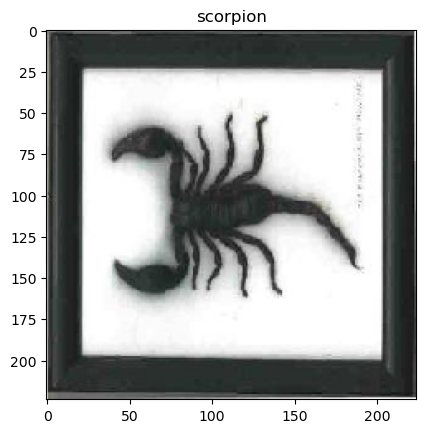

In [9]:
# show a random image
index = random.randint(0, len(images))
plt.imshow(images[index].astype(np.float32) / 255)
plt.title(class_names[labels[index]])
plt.show()

In [10]:
labels

array([ 0,  0,  0, ..., 94, 94, 94])

In [11]:
images[64]

array([[[254., 253., 255.],
        [251., 250., 255.],
        [225., 224., 229.],
        ...,
        [253., 253., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[232., 231., 236.],
        [247., 246., 251.],
        [226., 225., 230.],
        ...,
        [249., 249., 251.],
        [251., 251., 253.],
        [251., 251., 253.]],

       [[203., 202., 208.],
        [225., 224., 230.],
        [224., 223., 229.],
        ...,
        [248., 248., 250.],
        [250., 250., 252.],
        [250., 250., 252.]],

       ...,

       [[191., 200., 243.],
        [190., 199., 242.],
        [187., 196., 239.],
        ...,
        [218., 225., 251.],
        [227., 235., 254.],
        [235., 242., 255.]],

       [[190., 199., 242.],
        [190., 199., 242.],
        [187., 196., 239.],
        ...,
        [218., 225., 251.],
        [227., 235., 254.],
        [235., 242., 255.]],

       [[187., 198., 243.],
        [187., 198., 243.],
        [185., 1

# Data Augmentation

As seen in [exploratory_data_analysis.ipynb](exploratory_data_analysis.ipynb), each class has a different number of images. This will cause bias in our model towards certain classes. We need to fix this by generating more images for the classes that are under represented.

In [12]:
mem_check()

images: 1656.62 MB
__: 0.02 MB
labels: 0.02 MB
_10: 0.02 MB
___: 0.00 MB
class_names: 0.00 MB
_8: 0.00 MB
_i1: 0.00 MB
exclude_classes: 0.00 MB
_i6: 0.00 MB
_oh: 0.00 MB
Out: 0.00 MB
_iii: 0.00 MB
_i9: 0.00 MB
_ih: 0.00 MB
In: 0.00 MB
_i5: 0.00 MB
directory: 0.00 MB
_: 0.00 MB
_11: 0.00 MB
open: 0.00 MB
mem_check: 0.00 MB
load_images_and_labels: 0.00 MB
train_test_split: 0.00 MB
__doc__: 0.00 MB
__vsc_ipynb_file__: 0.00 MB
_i4: 0.00 MB
_i2: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
sys: 0.00 MB
gc: 0.00 MB
_i3: 0.00 MB
tf: 0.00 MB
_4: 0.00 MB
random: 0.00 MB
plt: 0.00 MB
np: 0.00 MB
shutil: 0.00 MB
_dh: 0.00 MB
get_ipython: 0.00 MB
_i7: 0.00 MB
_i8: 0.00 MB
_i12: 0.00 MB
_i: 0.00 MB
_i11: 0.00 MB
__name__: 0.00 MB
_ii: 0.00 MB
_i10: 0.00 MB
exit: 0.00 MB
quit: 0.00 MB
img_height: 0.00 MB
img_width: 0.00 MB
index: 0.00 MB
__package__: 0.00 MB
__loader__: 0.00 MB
__spec__: 0.00 MB
Total memory usage: 1656.70 MB


In [ ]:
import os
import numpy as np
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# output path for saving augmented images
output_dir = "augmented_data"
os.makedirs(output_dir, exist_ok=True)

unique_classes, class_counts = np.unique(labels, return_counts=True)
max_count = np.max(class_counts)

for class_id in unique_classes:
    print(f"Augmenting class name {class_names[class_id]} with class id {class_id}...")
    # get all images and labels of the current class
    mask = labels == class_id
    class_images = images[mask]
    class_labels = labels[mask]

    # save the ones we already have to disk
    for i, img in enumerate(class_images):
        np.save(os.path.join(output_dir, f"class_{class_id}_img_{i}.npy"), img / 255.0)  # normalize and save

    num_to_generate = max_count - len(class_images)

    if num_to_generate > 0:
        # generate and save new images
        generated = 0
        for x_batch, y_batch in datagen.flow(class_images, class_labels, batch_size=32):
            del y_batch  # we don't need labels from the generator
            for j in range(len(x_batch)):
                if generated >= num_to_generate:
                    break
                np.save(
                    os.path.join(output_dir, f"class_{class_id}_aug_{generated}.npy"),
                    x_batch[j] / 255.0  # normalize and save
                )
                generated += 1
            if generated >= num_to_generate:
                break
        del x_batch  # batch no longer needed

    # cleanup variables for this class
    del class_images, class_labels

del images, labels  # free up memory

# load everything back into a single dataset
balanced_images = []
balanced_labels = []

for filename in os.listdir(output_dir):
    if filename.endswith(".npy"):
        # extract class_id from the filename
        print("Loading", filename, "to memory from disk.")
        class_id = int(filename.split("_")[1])
        balanced_images.append(np.load(os.path.join(output_dir, filename)))
        balanced_labels.append(class_id)

# delete the augmented data folder
print("Deleting augmented data folder")
shutil.rmtree(output_dir)

# convert to arrays and clean up memory
balanced_images = np.array(balanced_images, dtype=np.float16)
balanced_labels = np.array(balanced_labels, dtype=np.int32)

print("Balanced dataset created and loaded into memory.")

Augmenting class name accordion with class id 0...
Augmenting class name anchor with class id 1...
Augmenting class name ant with class id 2...
Augmenting class name barrel with class id 3...
Augmenting class name bass with class id 4...
Augmenting class name beaver with class id 5...
Augmenting class name binocular with class id 6...
Augmenting class name bonsai with class id 7...
Augmenting class name brain with class id 8...
Augmenting class name brontosaurus with class id 9...
Augmenting class name buddha with class id 10...
Augmenting class name butterfly with class id 11...
Augmenting class name camera with class id 12...
Augmenting class name cannon with class id 13...
Augmenting class name car_side with class id 14...
Augmenting class name ceiling_fan with class id 15...
Augmenting class name cellphone with class id 16...
Augmenting class name chair with class id 17...
Augmenting class name chandelier with class id 18...
Augmenting class name cougar_body with class id 19...
Aug

In [14]:
mem_check()

balanced_images: 3491.25 MB
balanced_labels: 0.05 MB
__: 0.02 MB
_10: 0.02 MB
mask: 0.01 MB
_i: 0.00 MB
_i13: 0.00 MB
class_counts: 0.00 MB
___: 0.00 MB
class_names: 0.00 MB
_8: 0.00 MB
_i1: 0.00 MB
unique_classes: 0.00 MB
exclude_classes: 0.00 MB
_i6: 0.00 MB
_oh: 0.00 MB
Out: 0.00 MB
_i9: 0.00 MB
_ih: 0.00 MB
In: 0.00 MB
_i5: 0.00 MB
directory: 0.00 MB
_: 0.00 MB
_11: 0.00 MB
img: 0.00 MB
open: 0.00 MB
mem_check: 0.00 MB
load_images_and_labels: 0.00 MB
train_test_split: 0.00 MB
__doc__: 0.00 MB
__vsc_ipynb_file__: 0.00 MB
_i4: 0.00 MB
_i2: 0.00 MB
output_dir: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
sys: 0.00 MB
gc: 0.00 MB
_i3: 0.00 MB
tf: 0.00 MB
_4: 0.00 MB
random: 0.00 MB
plt: 0.00 MB
np: 0.00 MB
shutil: 0.00 MB
os: 0.00 MB
filename: 0.00 MB
_dh: 0.00 MB
get_ipython: 0.00 MB
_ii: 0.00 MB
_i7: 0.00 MB
_i8: 0.00 MB
_i12: 0.00 MB
_i14: 0.00 MB
_iii: 0.00 MB
_i11: 0.00 MB
__name__: 0.00 MB
_i10: 0.00 MB
exit: 0.00 MB
quit: 0.00 MB
datagen: 0.00 MB
max_count: 0.00 MB
num_to_

In [15]:
# images = images / 255.0  # normalize
# x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=123)

# del images, labels  # free up memory

x_train, x_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, stratify=balanced_labels, random_state=123)

del balanced_images, balanced_labels  # free up memory
gc.collect()

print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Class Names: ['accordion', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler', 'starfish', 'stegosaurus', 'stop_sign', 'straw

In [16]:
mem_check()

x_train: 2793.00 MB
x_test: 698.25 MB
y_train: 0.04 MB
__: 0.02 MB
_10: 0.02 MB
y_test: 0.01 MB
mask: 0.01 MB
_iii: 0.00 MB
_i13: 0.00 MB
class_counts: 0.00 MB
___: 0.00 MB
class_names: 0.00 MB
_8: 0.00 MB
_i: 0.00 MB
_i15: 0.00 MB
_i1: 0.00 MB
unique_classes: 0.00 MB
exclude_classes: 0.00 MB
_i6: 0.00 MB
_ih: 0.00 MB
In: 0.00 MB
_oh: 0.00 MB
Out: 0.00 MB
_i9: 0.00 MB
_i5: 0.00 MB
directory: 0.00 MB
_: 0.00 MB
_11: 0.00 MB
img: 0.00 MB
open: 0.00 MB
mem_check: 0.00 MB
load_images_and_labels: 0.00 MB
train_test_split: 0.00 MB
__doc__: 0.00 MB
__vsc_ipynb_file__: 0.00 MB
_i4: 0.00 MB
_i2: 0.00 MB
output_dir: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
sys: 0.00 MB
gc: 0.00 MB
_i3: 0.00 MB
tf: 0.00 MB
_4: 0.00 MB
random: 0.00 MB
plt: 0.00 MB
np: 0.00 MB
shutil: 0.00 MB
os: 0.00 MB
filename: 0.00 MB
_dh: 0.00 MB
get_ipython: 0.00 MB
_ii: 0.00 MB
_i7: 0.00 MB
_i8: 0.00 MB
_i12: 0.00 MB
_i14: 0.00 MB
_i16: 0.00 MB
_i11: 0.00 MB
__name__: 0.00 MB
_i10: 0.00 MB
exit: 0.00 MB
quit: 0.00 

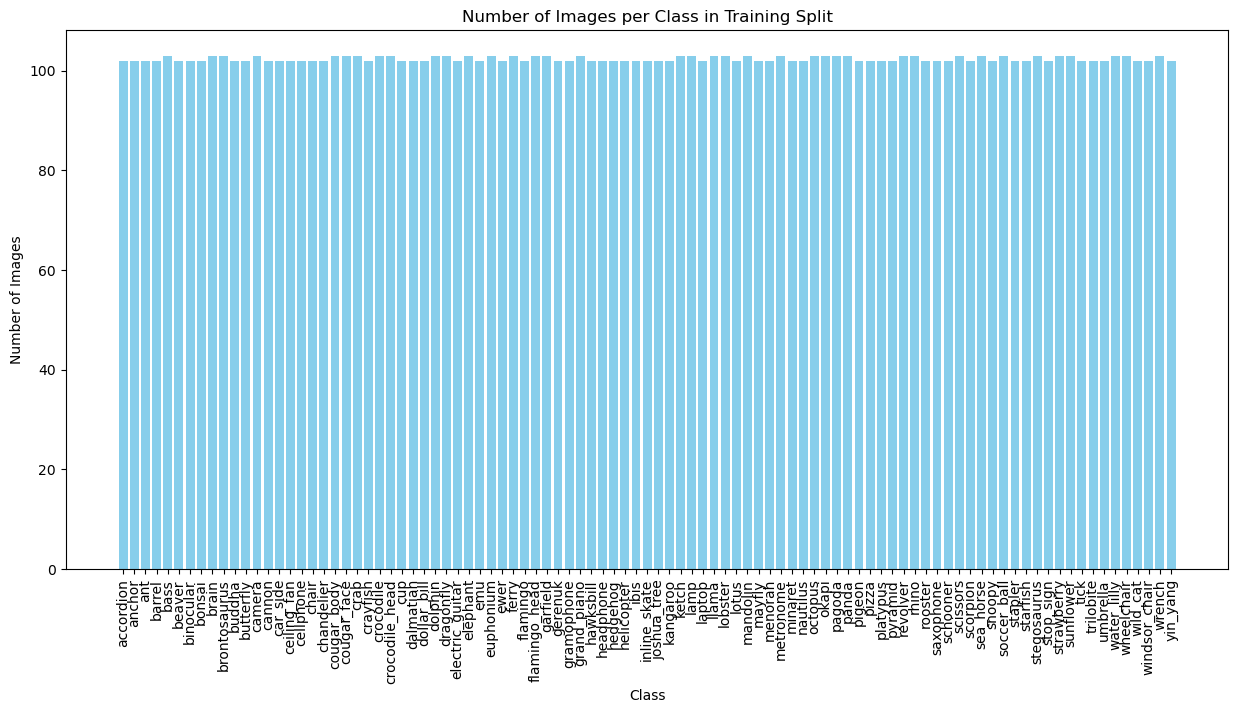

In [17]:
# show number of images per class in the training split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_train), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Split')
plt.show()

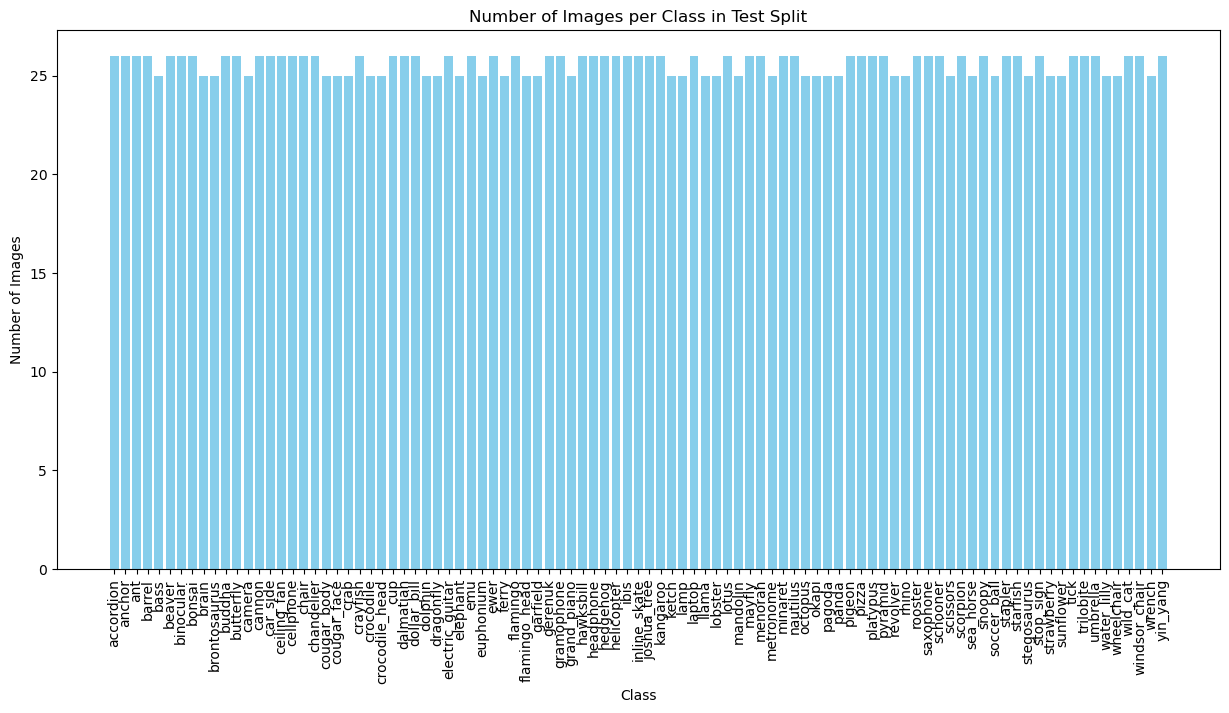

In [18]:
# show number of images per class in the test split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_test), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Test Split')
plt.show()

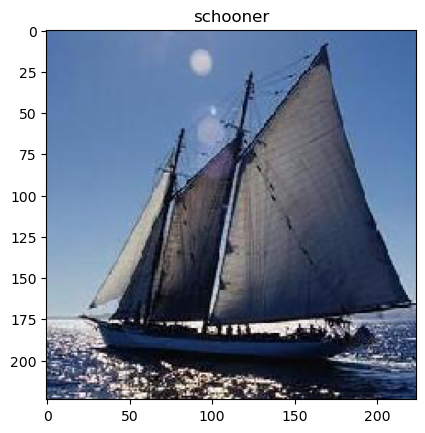

In [19]:
# shows a random augmented image
index = random.randint(0, len(x_train))
plt.imshow(x_train[index].astype(np.float32))
plt.title(class_names[y_train[index]])
plt.show()

# CNN Model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 512)               201867776 
                                                                 
 dropout (Dropout)           (None, 512)               0

In [21]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [24]:
print(f"x_train dtype: {x_train.dtype}")
print(f"x_test dtype: {x_test.dtype}")

x_train dtype: float16
x_test dtype: float16


In [25]:
gc.collect()
mem_check()

x_train: 2793.00 MB
x_test: 698.25 MB
y_train: 0.04 MB
__: 0.02 MB
_10: 0.02 MB
y_test: 0.01 MB
mask: 0.01 MB
_i13: 0.00 MB
class_counts: 0.00 MB
___: 0.00 MB
class_names: 0.00 MB
_8: 0.00 MB
_i15: 0.00 MB
_ii: 0.00 MB
_i23: 0.00 MB
_i1: 0.00 MB
unique_classes: 0.00 MB
_i20: 0.00 MB
exclude_classes: 0.00 MB
_i17: 0.00 MB
_i18: 0.00 MB
_i6: 0.00 MB
_ih: 0.00 MB
In: 0.00 MB
_oh: 0.00 MB
Out: 0.00 MB
_i19: 0.00 MB
_i9: 0.00 MB
_i5: 0.00 MB
_i21: 0.00 MB
directory: 0.00 MB
_: 0.00 MB
_11: 0.00 MB
img: 0.00 MB
open: 0.00 MB
mem_check: 0.00 MB
load_images_and_labels: 0.00 MB
train_test_split: 0.00 MB
_i: 0.00 MB
_i24: 0.00 MB
__doc__: 0.00 MB
__vsc_ipynb_file__: 0.00 MB
_i4: 0.00 MB
_i2: 0.00 MB
output_dir: 0.00 MB
_iii: 0.00 MB
_i22: 0.00 MB
_i25: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
sys: 0.00 MB
gc: 0.00 MB
_i3: 0.00 MB
tf: 0.00 MB
_4: 0.00 MB
random: 0.00 MB
plt: 0.00 MB
np: 0.00 MB
shutil: 0.00 MB
os: 0.00 MB
filename: 0.00 MB
_dh: 0.00 MB
get_ipython: 0.00 MB
_i7: 0.00 MB


In [26]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="max",
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    x_train, y_train, epochs=50, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

37/37 [==============================] - 1s 22ms/step - loss: 5.8203 - accuracy: 0.0719
Test accuracy: 0.07192374020814896


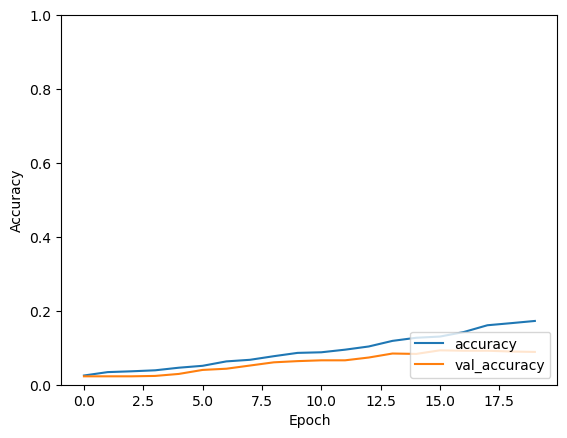

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Use transfer learning to improve results and stop overfitting

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
gc.collect()
mem_check()

x_train: 1325.30 MB
x_test: 331.32 MB
__: 0.02 MB
_10: 0.02 MB
y_train: 0.02 MB
y_test: 0.00 MB
_i13: 0.00 MB
___: 0.00 MB
class_names: 0.00 MB
_8: 0.00 MB
_iii: 0.00 MB
_i26: 0.00 MB
_i15: 0.00 MB
_ii: 0.00 MB
_i27: 0.00 MB
_i23: 0.00 MB
_i1: 0.00 MB
_i20: 0.00 MB
exclude_classes: 0.00 MB
_i17: 0.00 MB
_i18: 0.00 MB
_i6: 0.00 MB
_ih: 0.00 MB
In: 0.00 MB
_i25: 0.00 MB
_oh: 0.00 MB
Out: 0.00 MB
_i19: 0.00 MB
_i9: 0.00 MB
_i5: 0.00 MB
_i21: 0.00 MB
directory: 0.00 MB
_: 0.00 MB
_11: 0.00 MB
open: 0.00 MB
mem_check: 0.00 MB
load_images_and_labels: 0.00 MB
train_test_split: 0.00 MB
_i24: 0.00 MB
__doc__: 0.00 MB
__vsc_ipynb_file__: 0.00 MB
_i4: 0.00 MB
_i2: 0.00 MB
_i29: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
sys: 0.00 MB
_i3: 0.00 MB
tf: 0.00 MB
_4: 0.00 MB
random: 0.00 MB
plt: 0.00 MB
np: 0.00 MB
shutil: 0.00 MB
gc: 0.00 MB
_dh: 0.00 MB
get_ipython: 0.00 MB
_i: 0.00 MB
_i7: 0.00 MB
_i8: 0.00 MB
_i12: 0.00 MB
_i14: 0.00 MB
_i16: 0.00 MB
_i22: 0.00 MB
_i28: 0.00 MB
_i11: 0.00 M

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
116/116 [==============================] - ETA: 0s - loss: 4.5558 - accuracy: 0.0184
Epoch 1: val_accuracy improved from -inf to 0.01407, saving model to best_transfer_learning_model_fix_overfitting.h5
116/116 [==============================] - 23s 165ms/step - loss: 4.5558 - accuracy: 0.0184 - val_loss: 4.3617 - val_accuracy: 0.0141
Epoch 2/100
115/116 [============================>.] - ETA: 0s - loss: 4.3704 - accuracy: 0.0269
Epoch 2: val_accuracy improved from 0.01407 to 0.04870, saving model to best_transfer_learning_model_fix_overfitting.h5
116/116 [==============================] - 14s 121ms/step - loss: 4.3704 - accuracy: 0.0268 - val_loss: 4.2099 - val_accuracy: 0.0487
Epoch 3/100
115/116 [============================>.] - ETA: 0s - loss: 4.2802 - accuracy: 0.0364
Epoch 3: val_accuracy improved from 0.04870 to 0.05303, saving model to best_transfer_learning_model_fix_overfitting.h5
116/116 [==============================] - 14s 120ms/step - loss: 4.2782 - accuracy:

In [ ]:
gc.collect()
mem_check()

x_train: 1325.30 MB
x_test: 331.32 MB
__: 0.02 MB
_10: 0.02 MB
y_train: 0.02 MB
y_test: 0.00 MB
_i13: 0.00 MB
___: 0.00 MB
class_names: 0.00 MB
_8: 0.00 MB
_i26: 0.00 MB
_i15: 0.00 MB
_ii: 0.00 MB
_i27: 0.00 MB
_i30: 0.00 MB
_i23: 0.00 MB
_i1: 0.00 MB
_i20: 0.00 MB
exclude_classes: 0.00 MB
_i17: 0.00 MB
_ih: 0.00 MB
In: 0.00 MB
_i18: 0.00 MB
_i6: 0.00 MB
_i25: 0.00 MB
_oh: 0.00 MB
Out: 0.00 MB
_i19: 0.00 MB
_i9: 0.00 MB
_i5: 0.00 MB
_i21: 0.00 MB
directory: 0.00 MB
_: 0.00 MB
_11: 0.00 MB
open: 0.00 MB
mem_check: 0.00 MB
load_images_and_labels: 0.00 MB
train_test_split: 0.00 MB
_i: 0.00 MB
_i24: 0.00 MB
_i31: 0.00 MB
__doc__: 0.00 MB
__vsc_ipynb_file__: 0.00 MB
_i4: 0.00 MB
_i2: 0.00 MB
_iii: 0.00 MB
_i29: 0.00 MB
_i32: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
sys: 0.00 MB
_i3: 0.00 MB
tf: 0.00 MB
_4: 0.00 MB
random: 0.00 MB
plt: 0.00 MB
np: 0.00 MB
shutil: 0.00 MB
gc: 0.00 MB
_dh: 0.00 MB
get_ipython: 0.00 MB
_i7: 0.00 MB
_i8: 0.00 MB
_i12: 0.00 MB
_i14: 0.00 MB
_i16: 0.00 M

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

37/37 [==============================] - 4s 119ms/step - loss: 3.0294 - accuracy: 0.2929
Test accuracy: 0.29289427399635315


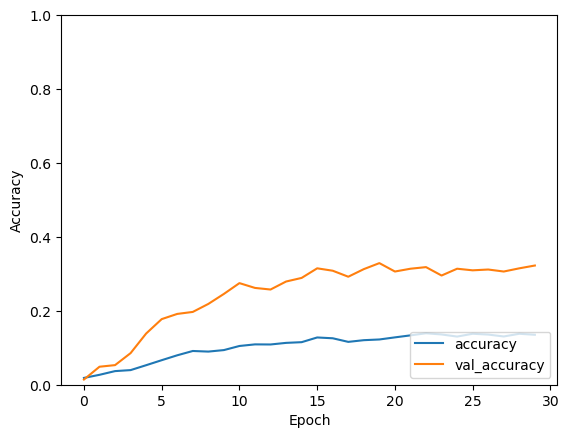

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

As we can see above, using the pretrained model has helped stop the overfitting, but our evaluation accuracy is plateauing at around 55%. Let's fix that by adjusting the layers.

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# unfreeze the last layers of the base model
for layer in base_model.layers[-8:]:
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

reduce_learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=3,
    mode="auto",
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
243/244 [============================>.] - ETA: 0s - loss: 5.0485 - accuracy: 0.0869
Epoch 1: val_accuracy improved from -inf to 0.26670, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 17s 63ms/step - loss: 5.0481 - accuracy: 0.0869 - val_loss: 3.5296 - val_accuracy: 0.2667
Epoch 2/100
243/244 [============================>.] - ETA: 0s - loss: 3.3034 - accuracy: 0.2801
Epoch 2: val_accuracy improved from 0.26670 to 0.41470, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 12s 51ms/step - loss: 3.3027 - accuracy: 0.2804 - val_loss: 2.7285 - val_accuracy: 0.4147
Epoch 3/100
243/244 [============================>.] - ETA: 0s - loss: 2.7721 - accuracy: 0.3875
Epoch 3: val_accuracy improved from 0.41470 to 0.50925, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 13s 51ms/step - loss: 2.7728 - accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

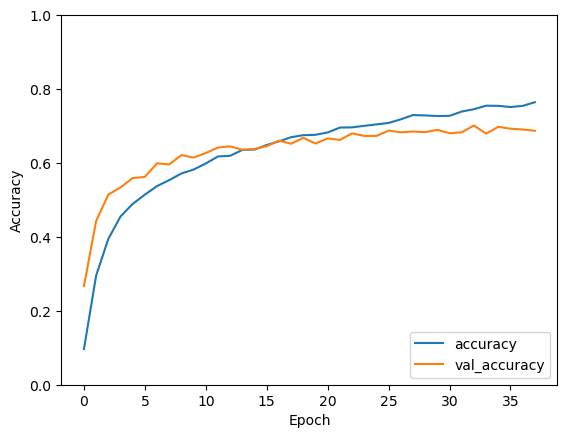

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

# Accuracy is higher, but still not fully reliable. Choosing a pretrained model with more layers should give better results.

In [ ]:
# use inceptionv3
base_model = tf.keras.applications.InceptionV3(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# unfreeze the last layers of the base model
for layer in base_model.layers[-40:]:
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.0005 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_377 (Conv2D)            (None, 63, 63, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_377 (Batch  (None, 63, 63, 32)  96          ['conv2d_377[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="InceptionV3.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

reduce_learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=3,
    mode="auto",
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 3s 35ms/step - loss: 2.8869 - accuracy: 0.5909
Test accuracy: 0.5908716917037964


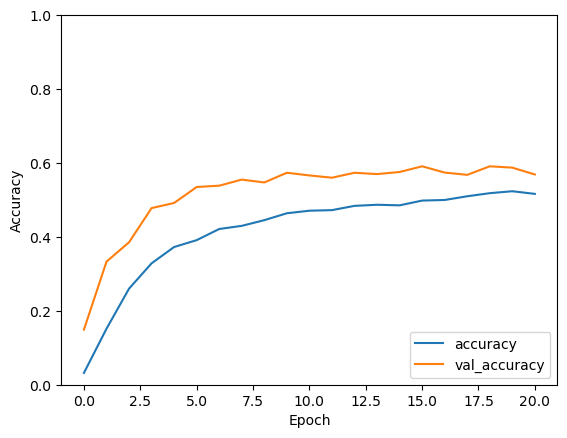

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 